# **Preprocessing Data**



In [1]:
# Load data from 3 files
import pandas as pd
df1 = pd.read_csv("datasets/Permission Dataset.csv", delimiter=";")
df2 = pd.read_csv("datasets/Recievers Dataset.csv", delimiter=";")
df3 = pd.read_csv("datasets/Services Dataset.csv", delimiter=";")

df1.shape, df2.shape, df3.shape

((11975, 1491), (11975, 594), (11975, 856))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("datasets/Permission Dataset.csv", delimiter=";")

# Check the balance of the 'class' column
print("\nNumber of instances in each class:")
print(df['class'].value_counts())

# Plot the balance of the 'class' column
plt.figure(figsize=(6,4))
df['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



ModuleNotFoundError: No module named 'seaborn'

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# Separate the features and the target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "LinearSVC": LinearSVC()
}

# Function to evaluate models
def evaluate_models(models, X, y):
    for name, model in models.items():
        model.fit(X, y)
        accuracy = model.score(X, y)
        print(f"{name} Accuracy: {accuracy}")

# Call the function
evaluate_models(models, X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9073068893528183
Decision Tree Accuracy: 0.9708768267223382
Random Forest Accuracy: 0.9708768267223382
XGBoost Accuracy: 0.9409185803757829
KNN Accuracy: 0.9210855949895616
SVM Accuracy: 0.9226513569937369
Gradient Boosting Accuracy: 0.9058455114822547
AdaBoost Accuracy: 0.8982254697286013
LinearSVC Accuracy: 0.9146137787056368


In [19]:
df.shape

(11975, 1491)

In [20]:
df.isnull().sum()

permission.GetuiService.com.glodon.ynjtapp    0
permission.COLLECT_METRICS                    0
permission.sec.MDM_PHONE_RESTRICTION          0
permission.MEDIA_MOUNTED                      0
permission.USAGE_ACCESS_SETTINGS              0
                                             ..
permission.GetuiService.com.hooray.snm        0
permission.READ_USAGESTATS                    0
permission.USE_IFAA_MANAGER                   0
permission.READ_MEDIA_STORAGE                 0
class                                         0
Length: 1491, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Separate the features and the target variable
Xx = df.drop('class', axis=1)
yy = df['class']



# Perform feature importance
rf = RandomForestClassifier()
rf.fit(Xx, yy)
importances = rf.feature_importances_

# Get the top 50% important features
num_features = int(len(Xx.columns) * 0.5)
important_features = Xx.columns[importances.argsort()[-num_features:][::-1]]

# Select important features from the original dataset
df_selected = df[important_features.tolist() + ['class']]

# Save selected features to a new CSV file
df_selected.to_csv('selected_features.csv', index=False)


In [25]:

# Get the top 50% important features
num_features = int(len(X.columns) * 0.5)
important_features = X.columns[importances.argsort()[-num_features:][::-1]]
important_features_importance = importances[importances.argsort()[-num_features:][::-1]]

# Create a DataFrame of selected features and their importance
df_importance = pd.DataFrame({'Feature': important_features, 'Importance': important_features_importance})
# Save the DataFrame to a CSV file
df_importance.to_csv('feature_importance.csv', index=False)

# Print the DataFrame
print(df_importance)

                                  Feature  Importance
0             permission.READ_PHONE_STATE    0.076616
1    permission.MOUNT_UNMOUNT_FILESYSTEMS    0.063153
2                      permission.RECEIVE    0.056047
3          permission.SYSTEM_ALERT_WINDOW    0.052092
4                    permission.GET_TASKS    0.047943
..                                    ...         ...
740      permission..ACCESS_FINE_LOCATION    0.000005
741             permission.ENTERPRISE_API    0.000005
742       permission.CHECK_NUMBER_BLOCKED    0.000005
743              permission.READ_PROVIDER    0.000005
744      permission.RRAD_EXTERNAL_STORAGE    0.000005

[745 rows x 2 columns]


## **Normalizing**



In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
dfsel = pd.read_csv("datasets/selected_features.csv")
# Separate the features and the target variable
X = dfsel.drop('class', axis=1)
y = dfsel['class']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit and transform the features using MinMaxScaler
X_scaled = scaler.fit_transform(X)
np.set_printoptions(precision=3)
# If necessary, reshape the features for 3D input
X_reshaped = np.reshape(X_scaled,(X_scaled.shape[0], 1, X_scaled.shape[1]))

# Convert the target variable into numpy array
y_array = np.array(y)

In [4]:
X_reshaped.shape , y_array.shape , X_reshaped.dtype , y_array.dtype

((11975, 1, 745), (11975,), dtype('float64'), dtype('int64'))

In [5]:
input_shape = X_reshaped.shape[1], X_reshaped.shape[2]

In [6]:
X_reshaped.shape[1], X_reshaped.shape[2]

(1, 745)

# **Arsitektur Model**



In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam, Adamax, SGD
from keras_radam import RAdam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import pandas as pd
from keras.regularizers import l1_l2


def create_model(input_shape):
    model = Sequential()
    model.add(GRU(512, return_sequences=True, input_shape=input_shape))
    model.add(GRU(512, return_sequences=True, dropout=0.2))
    model.add(GRU(256, return_sequences=True, dropout=0.2))
    model.add(GRU(128, return_sequences=False, dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    return model

2023-07-15 09:43:48.120165: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# **Training Model**



In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle


In [9]:
# Define optimizers
from keras_radam import RAdam

# Define optimizers
optimizers = [
    ('radam', RAdam(learning_rate=0.0001)),
    ('adamax', tf.keras.optimizers.Adamax(learning_rate=0.0001)),
    ('adam', tf.keras.optimizers.Adam(learning_rate=0.0001)),
    ('sgd', tf.keras.optimizers.SGD(learning_rate=0.001))
]

2023-07-15 09:43:50.472828: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 09:43:50.838197: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7910 MB memory:  -> device: 0, name: A100-SXM4-40GB MIG 2g.10gb, pci bus id: 0000:b7:00.0, compute capability: 8.0


In [14]:
from keras_radam.training import RAdamOptimizer

# Define optimizers
optimizers = [
    ('radam', RAdamOptimizer(learning_rate=0.0001)),
    ('adamax', tf.keras.optimizers.Adamax(learning_rate=0.0001)),
    ('adam', tf.keras.optimizers.Adam(learning_rate=0.0001)),
    ('sgd', tf.keras.optimizers.SGD(learning_rate=0.001))
]

In [15]:
from sklearn.model_selection import KFold
# Jumlah fold yang diinginkan
num_folds = 10

# Inisialisasi KFold dengan jumlah fold yang diinginkan
kfold = KFold(n_splits=num_folds, shuffle=True)

In [16]:
# Define the function to calculate specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

In [17]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time

# Define DataFrame to store performance of each model
performance_df = pd.DataFrame(columns=['optimizer', 'fold', 'val_accuracy', 'val_loss', 'precision', 'recall', 'f1_score', 'specificity', 'tp', 'tn', 'fp', 'fn', 'training_time', 'training_accuracy', 'training_loss'])

histories = []
models = []


# Define variables to store average values
avg_tp = 0
avg_tn = 0
avg_fp = 0
avg_fn = 0

In [18]:
for optimizer_name, optimizer in optimizers:
    optimizer_histories = []
    for fold, (train_index, val_index) in enumerate(kfold.split(X_reshaped, y_array)):
        X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
        y_train, y_val = y_array[train_index], y_array[val_index]

        model = create_model(input_shape)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        # Define the checkpoint for each fold
        filepath = f"model_{optimizer_name}_fold{fold+1}.hdf5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
        callbacks_list = [checkpoint]

        start_time = time.time()
        history = model.fit(X_train, y_train, epochs=30, batch_size=64, 
                            validation_data=(X_val, y_val), callbacks=callbacks_list)
        end_time = time.time()

        # Calculate training time
        training_time = end_time - start_time

        # Evaluate the model on the training data
        _, training_accuracy = model.evaluate(X_train, y_train, verbose=0)
        training_loss = history.history['loss'][-1]

        # Evaluate the model on the validation data
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        
        # Make predictions
        y_pred = model.predict(X_val)
        y_pred = (y_pred > 0.5).astype(int)

        precision = precision_score(y_val, y_pred, average='macro')
        recall = recall_score(y_val, y_pred, average='macro')
        f1 = f1_score(y_val, y_pred, average='macro')

        # Calculate specificity
        specificity = specificity_score(y_val, y_pred)

        
        # Calculate specificity
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        specificity = tn / (tn + fp)

        # Print TP, TN, FP, FN for the current fold
        print(f"Fold {fold+1} - TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

        # Update average values
        avg_tp += tp
        avg_tn += tn
        avg_fp += fp
        avg_fn += fn

        
        
        # Save the performance metrics to the DataFrame
        performance_df = performance_df.append({
            'training_accuracy': training_accuracy,
            'training_loss': training_loss,
            'optimizer': optimizer_name,
            'fold': fold+1,
            'val_accuracy': val_accuracy,
            'val_loss': val_loss,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'specificity': specificity,
            'tp': tp,
            'tn': tn,
            'fp': fp,
            'fn': fn,
            'training_time': training_time
        }, ignore_index=True)
        optimizer_histories.append(history)
        
    histories.append(optimizer_histories)
    models.append(model)


Epoch 1/30


2023-07-15 09:46:36.239819: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-15 09:46:36.411808: I tensorflow/stream_executor/cuda/cuda_blas.cc:1633] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


169/169 [==============================] - ETA: 0s - loss: 0.6649 - accuracy: 0.7370
Epoch 1: val_loss improved from inf to 0.54867, saving model to model_radam_fold1.hdf5
169/169 [==============================] - 8s 13ms/step - loss: 0.6649 - accuracy: 0.7370 - val_loss: 0.5487 - val_accuracy: 0.8280
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.3772 - accuracy: 0.8673
Epoch 2: val_loss improved from 0.54867 to 0.26244, saving model to model_radam_fold1.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.3772 - accuracy: 0.8673 - val_loss: 0.2624 - val_accuracy: 0.9032
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.2779 - accuracy: 0.8940
Epoch 3: val_loss improved from 0.26244 to 0.23777, saving model to model_radam_fold1.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2779 - accuracy: 0.8940 - val_loss: 0.2378 - val_accuracy: 0.9182
Epoch 4/30
169/169 [==============================] - ETA: 0

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
168/169 [============================>.] - ETA: 0s - loss: 0.3084 - accuracy: 0.8746
Epoch 1: val_loss improved from inf to 0.23688, saving model to model_radam_fold2.hdf5
169/169 [==============================] - 7s 14ms/step - loss: 0.3083 - accuracy: 0.8745 - val_loss: 0.2369 - val_accuracy: 0.9165
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.2524 - accuracy: 0.9037
Epoch 2: val_loss improved from 0.23688 to 0.23675, saving model to model_radam_fold2.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2524 - accuracy: 0.9037 - val_loss: 0.2367 - val_accuracy: 0.9157
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.2447 - accuracy: 0.9043
Epoch 3: val_loss improved from 0.23675 to 0.23481, saving model to model_radam_fold2.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2447 - accuracy: 0.9043 - val_loss: 0.2348 - val_accuracy: 0.9124
Epoch 4/30
169/169 [=============================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.3021 - accuracy: 0.8711
Epoch 1: val_loss improved from inf to 0.26263, saving model to model_radam_fold3.hdf5
169/169 [==============================] - 7s 13ms/step - loss: 0.3021 - accuracy: 0.8711 - val_loss: 0.2626 - val_accuracy: 0.8948
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.2493 - accuracy: 0.9047
Epoch 2: val_loss improved from 0.26263 to 0.25501, saving model to model_radam_fold3.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2493 - accuracy: 0.9047 - val_loss: 0.2550 - val_accuracy: 0.8957
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.2435 - accuracy: 0.9073
Epoch 3: val_loss improved from 0.25501 to 0.25361, saving model to model_radam_fold3.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2435 - accuracy: 0.9073 - val_loss: 0.2536 - val_accuracy: 0.8965
Epoch 4/30
169/169 [=============================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.3081 - accuracy: 0.8655
Epoch 1: val_loss improved from inf to 0.24728, saving model to model_radam_fold4.hdf5
169/169 [==============================] - 7s 13ms/step - loss: 0.3081 - accuracy: 0.8655 - val_loss: 0.2473 - val_accuracy: 0.9124
Epoch 2/30
168/169 [============================>.] - ETA: 0s - loss: 0.2525 - accuracy: 0.9036
Epoch 2: val_loss improved from 0.24728 to 0.24073, saving model to model_radam_fold4.hdf5
169/169 [==============================] - 1s 9ms/step - loss: 0.2527 - accuracy: 0.9036 - val_loss: 0.2407 - val_accuracy: 0.9140
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.9025
Epoch 3: val_loss improved from 0.24073 to 0.23894, saving model to model_radam_fold4.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2474 - accuracy: 0.9025 - val_loss: 0.2389 - val_accuracy: 0.9157
Epoch 4/30
163/169 [===========================>.

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.3002 - accuracy: 0.8813
Epoch 1: val_loss improved from inf to 0.26630, saving model to model_radam_fold5.hdf5
169/169 [==============================] - 7s 13ms/step - loss: 0.3002 - accuracy: 0.8813 - val_loss: 0.2663 - val_accuracy: 0.8982
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.9043
Epoch 2: val_loss improved from 0.26630 to 0.26112, saving model to model_radam_fold5.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2500 - accuracy: 0.9043 - val_loss: 0.2611 - val_accuracy: 0.8982
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.2420 - accuracy: 0.9063
Epoch 3: val_loss did not improve from 0.26112
169/169 [==============================] - 1s 8ms/step - loss: 0.2420 - accuracy: 0.9063 - val_loss: 0.2624 - val_accuracy: 0.8998
Epoch 4/30
169/169 [==============================] - ETA: 0s - loss: 0.2384 - accuracy: 0.90

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.3020 - accuracy: 0.8738
Epoch 1: val_loss improved from inf to 0.31804, saving model to model_radam_fold6.hdf5
169/169 [==============================] - 7s 13ms/step - loss: 0.3020 - accuracy: 0.8738 - val_loss: 0.3180 - val_accuracy: 0.8822
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.2448 - accuracy: 0.9054
Epoch 2: val_loss improved from 0.31804 to 0.30983, saving model to model_radam_fold6.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2448 - accuracy: 0.9054 - val_loss: 0.3098 - val_accuracy: 0.8839
Epoch 3/30
163/169 [===========================>..] - ETA: 0s - loss: 0.2386 - accuracy: 0.9099
Epoch 3: val_loss did not improve from 0.30983
169/169 [==============================] - 1s 9ms/step - loss: 0.2388 - accuracy: 0.9096 - val_loss: 0.3169 - val_accuracy: 0.8839
Epoch 4/30
163/169 [===========================>..] - ETA: 0s - loss: 0.2330 - accuracy: 0.91

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.3032 - accuracy: 0.8773
Epoch 1: val_loss improved from inf to 0.26674, saving model to model_radam_fold7.hdf5
169/169 [==============================] - 7s 13ms/step - loss: 0.3032 - accuracy: 0.8773 - val_loss: 0.2667 - val_accuracy: 0.8964
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.2503 - accuracy: 0.9057
Epoch 2: val_loss improved from 0.26674 to 0.25945, saving model to model_radam_fold7.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2503 - accuracy: 0.9057 - val_loss: 0.2595 - val_accuracy: 0.8981
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.2441 - accuracy: 0.9079
Epoch 3: val_loss improved from 0.25945 to 0.25889, saving model to model_radam_fold7.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2441 - accuracy: 0.9079 - val_loss: 0.2589 - val_accuracy: 0.8981
Epoch 4/30
169/169 [=============================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.3025 - accuracy: 0.8743
Epoch 1: val_loss improved from inf to 0.26294, saving model to model_radam_fold8.hdf5
169/169 [==============================] - 7s 13ms/step - loss: 0.3025 - accuracy: 0.8743 - val_loss: 0.2629 - val_accuracy: 0.8972
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.2491 - accuracy: 0.9034
Epoch 2: val_loss did not improve from 0.26294
169/169 [==============================] - 1s 8ms/step - loss: 0.2491 - accuracy: 0.9034 - val_loss: 0.2644 - val_accuracy: 0.9014
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.2433 - accuracy: 0.9057
Epoch 3: val_loss improved from 0.26294 to 0.25432, saving model to model_radam_fold8.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2433 - accuracy: 0.9057 - val_loss: 0.2543 - val_accuracy: 0.9081
Epoch 4/30
169/169 [==============================] - ETA: 0s - loss: 0.2387 - accuracy: 0.90

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.3020 - accuracy: 0.8828
Epoch 1: val_loss improved from inf to 0.28746, saving model to model_radam_fold9.hdf5
169/169 [==============================] - 8s 13ms/step - loss: 0.3020 - accuracy: 0.8828 - val_loss: 0.2875 - val_accuracy: 0.8881
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.2483 - accuracy: 0.9056
Epoch 2: val_loss improved from 0.28746 to 0.28583, saving model to model_radam_fold9.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2483 - accuracy: 0.9056 - val_loss: 0.2858 - val_accuracy: 0.8872
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.2435 - accuracy: 0.9061
Epoch 3: val_loss improved from 0.28583 to 0.27683, saving model to model_radam_fold9.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2435 - accuracy: 0.9061 - val_loss: 0.2768 - val_accuracy: 0.8914
Epoch 4/30
169/169 [=============================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.3082 - accuracy: 0.8791
Epoch 1: val_loss improved from inf to 0.23745, saving model to model_radam_fold10.hdf5
169/169 [==============================] - 7s 13ms/step - loss: 0.3082 - accuracy: 0.8791 - val_loss: 0.2374 - val_accuracy: 0.9114
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.2522 - accuracy: 0.9036
Epoch 2: val_loss did not improve from 0.23745
169/169 [==============================] - 1s 8ms/step - loss: 0.2522 - accuracy: 0.9036 - val_loss: 0.2377 - val_accuracy: 0.9006
Epoch 3/30
168/169 [============================>.] - ETA: 0s - loss: 0.2446 - accuracy: 0.9058
Epoch 3: val_loss improved from 0.23745 to 0.23701, saving model to model_radam_fold10.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2447 - accuracy: 0.9057 - val_loss: 0.2370 - val_accuracy: 0.9039
Epoch 4/30
169/169 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.5242 - accuracy: 0.7849
Epoch 1: val_loss improved from inf to 0.32291, saving model to model_adamax_fold1.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.5213 - accuracy: 0.7861 - val_loss: 0.3229 - val_accuracy: 0.8790
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.2985 - accuracy: 0.8870
Epoch 2: val_loss improved from 0.32291 to 0.27598, saving model to model_adamax_fold1.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.2987 - accuracy: 0.8866 - val_loss: 0.2760 - val_accuracy: 0.8890
Epoch 3/30
166/169 [============================>.] - ETA: 0s - loss: 0.2770 - accuracy: 0.8949
Epoch 3: val_loss improved from 0.27598 to 0.26658, saving model to model_adamax_fold1.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.2767 - accuracy: 0.8951 - val_loss: 0.2666 - val_accuracy: 0.8907
Epoch 4/30
166/169 [==========================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.5606 - accuracy: 0.6882
Epoch 1: val_loss improved from inf to 0.33675, saving model to model_adamax_fold2.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.5575 - accuracy: 0.6911 - val_loss: 0.3368 - val_accuracy: 0.8781
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.3031 - accuracy: 0.8868
Epoch 2: val_loss improved from 0.33675 to 0.27506, saving model to model_adamax_fold2.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.3026 - accuracy: 0.8867 - val_loss: 0.2751 - val_accuracy: 0.8990
Epoch 3/30
168/169 [============================>.] - ETA: 0s - loss: 0.2775 - accuracy: 0.8936
Epoch 3: val_loss improved from 0.27506 to 0.26559, saving model to model_adamax_fold2.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.2774 - accuracy: 0.8936 - val_loss: 0.2656 - val_accuracy: 0.9032
Epoch 4/30
166/169 [==========================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.5494 - accuracy: 0.7687
Epoch 1: val_loss improved from inf to 0.32746, saving model to model_adamax_fold3.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.5472 - accuracy: 0.7697 - val_loss: 0.3275 - val_accuracy: 0.8932
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.3043 - accuracy: 0.8844
Epoch 2: val_loss improved from 0.32746 to 0.27635, saving model to model_adamax_fold3.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.3057 - accuracy: 0.8837 - val_loss: 0.2763 - val_accuracy: 0.8948
Epoch 3/30
166/169 [============================>.] - ETA: 0s - loss: 0.2820 - accuracy: 0.8914
Epoch 3: val_loss improved from 0.27635 to 0.26694, saving model to model_adamax_fold3.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.2825 - accuracy: 0.8914 - val_loss: 0.2669 - val_accuracy: 0.8982
Epoch 4/30
166/169 [==========================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.5422 - accuracy: 0.7349
Epoch 1: val_loss improved from inf to 0.34000, saving model to model_adamax_fold4.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.5394 - accuracy: 0.7369 - val_loss: 0.3400 - val_accuracy: 0.8689
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.3041 - accuracy: 0.8855
Epoch 2: val_loss improved from 0.34000 to 0.28473, saving model to model_adamax_fold4.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.3045 - accuracy: 0.8852 - val_loss: 0.2847 - val_accuracy: 0.8915
Epoch 3/30
166/169 [============================>.] - ETA: 0s - loss: 0.2793 - accuracy: 0.8918
Epoch 3: val_loss improved from 0.28473 to 0.27393, saving model to model_adamax_fold4.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.2785 - accuracy: 0.8924 - val_loss: 0.2739 - val_accuracy: 0.9007
Epoch 4/30
166/169 [==========================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.5505 - accuracy: 0.7720
Epoch 1: val_loss improved from inf to 0.34916, saving model to model_adamax_fold5.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.5472 - accuracy: 0.7737 - val_loss: 0.3492 - val_accuracy: 0.8740
Epoch 2/30
167/169 [============================>.] - ETA: 0s - loss: 0.3064 - accuracy: 0.8849
Epoch 2: val_loss improved from 0.34916 to 0.29466, saving model to model_adamax_fold5.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.3061 - accuracy: 0.8848 - val_loss: 0.2947 - val_accuracy: 0.8881
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.2786 - accuracy: 0.8939
Epoch 3: val_loss improved from 0.29466 to 0.28149, saving model to model_adamax_fold5.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.2786 - accuracy: 0.8939 - val_loss: 0.2815 - val_accuracy: 0.8907
Epoch 4/30
166/169 [==========================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
167/169 [============================>.] - ETA: 0s - loss: 0.5478 - accuracy: 0.7786
Epoch 1: val_loss improved from inf to 0.33913, saving model to model_adamax_fold6.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.5462 - accuracy: 0.7792 - val_loss: 0.3391 - val_accuracy: 0.8688
Epoch 2/30
167/169 [============================>.] - ETA: 0s - loss: 0.2999 - accuracy: 0.8861
Epoch 2: val_loss improved from 0.33913 to 0.28718, saving model to model_adamax_fold6.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.3006 - accuracy: 0.8857 - val_loss: 0.2872 - val_accuracy: 0.8872
Epoch 3/30
168/169 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.8946
Epoch 3: val_loss improved from 0.28718 to 0.27466, saving model to model_adamax_fold6.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.2784 - accuracy: 0.8945 - val_loss: 0.2747 - val_accuracy: 0.8864
Epoch 4/30
166/169 [==========================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
165/169 [============================>.] - ETA: 0s - loss: 0.5524 - accuracy: 0.7280
Epoch 1: val_loss improved from inf to 0.34368, saving model to model_adamax_fold7.hdf5
169/169 [==============================] - 6s 12ms/step - loss: 0.5480 - accuracy: 0.7312 - val_loss: 0.3437 - val_accuracy: 0.8655
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.3055 - accuracy: 0.8854
Epoch 2: val_loss improved from 0.34368 to 0.29460, saving model to model_adamax_fold7.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.3061 - accuracy: 0.8850 - val_loss: 0.2946 - val_accuracy: 0.8872
Epoch 3/30
166/169 [============================>.] - ETA: 0s - loss: 0.2785 - accuracy: 0.8938
Epoch 3: val_loss improved from 0.29460 to 0.28227, saving model to model_adamax_fold7.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.2795 - accuracy: 0.8935 - val_loss: 0.2823 - val_accuracy: 0.8889
Epoch 4/30
166/169 [==========================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.5584 - accuracy: 0.7356
Epoch 1: val_loss improved from inf to 0.35051, saving model to model_adamax_fold8.hdf5
169/169 [==============================] - 6s 12ms/step - loss: 0.5552 - accuracy: 0.7377 - val_loss: 0.3505 - val_accuracy: 0.8613
Epoch 2/30
167/169 [============================>.] - ETA: 0s - loss: 0.3052 - accuracy: 0.8859
Epoch 2: val_loss improved from 0.35051 to 0.28301, saving model to model_adamax_fold8.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.3059 - accuracy: 0.8856 - val_loss: 0.2830 - val_accuracy: 0.8897
Epoch 3/30
159/169 [===========================>..] - ETA: 0s - loss: 0.2804 - accuracy: 0.8923
Epoch 3: val_loss improved from 0.28301 to 0.27160, saving model to model_adamax_fold8.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.2796 - accuracy: 0.8920 - val_loss: 0.2716 - val_accuracy: 0.9006
Epoch 4/30
168/169 [==========================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
167/169 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7418
Epoch 1: val_loss improved from inf to 0.33018, saving model to model_adamax_fold9.hdf5
169/169 [==============================] - 6s 12ms/step - loss: 0.5545 - accuracy: 0.7432 - val_loss: 0.3302 - val_accuracy: 0.8822
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.3069 - accuracy: 0.8834
Epoch 2: val_loss improved from 0.33018 to 0.26722, saving model to model_adamax_fold9.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.3072 - accuracy: 0.8830 - val_loss: 0.2672 - val_accuracy: 0.8997
Epoch 3/30
167/169 [============================>.] - ETA: 0s - loss: 0.2797 - accuracy: 0.8943
Epoch 3: val_loss improved from 0.26722 to 0.25629, saving model to model_adamax_fold9.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.2790 - accuracy: 0.8945 - val_loss: 0.2563 - val_accuracy: 0.8964
Epoch 4/30
166/169 [==========================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.5470 - accuracy: 0.7562
Epoch 1: val_loss improved from inf to 0.36164, saving model to model_adamax_fold10.hdf5
169/169 [==============================] - 7s 12ms/step - loss: 0.5434 - accuracy: 0.7585 - val_loss: 0.3616 - val_accuracy: 0.8613
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.2980 - accuracy: 0.8875
Epoch 2: val_loss improved from 0.36164 to 0.31953, saving model to model_adamax_fold10.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.2980 - accuracy: 0.8875 - val_loss: 0.3195 - val_accuracy: 0.8797
Epoch 3/30
166/169 [============================>.] - ETA: 0s - loss: 0.2744 - accuracy: 0.8950
Epoch 3: val_loss improved from 0.31953 to 0.30578, saving model to model_adamax_fold10.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.2750 - accuracy: 0.8946 - val_loss: 0.3058 - val_accuracy: 0.8814
Epoch 4/30
167/169 [=======================

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
168/169 [============================>.] - ETA: 0s - loss: 0.3977 - accuracy: 0.8385
Epoch 1: val_loss improved from inf to 0.30422, saving model to model_adam_fold1.hdf5
169/169 [==============================] - 5s 10ms/step - loss: 0.3973 - accuracy: 0.8387 - val_loss: 0.3042 - val_accuracy: 0.8798
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.2609 - accuracy: 0.9018
Epoch 2: val_loss improved from 0.30422 to 0.29169, saving model to model_adam_fold1.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.2611 - accuracy: 0.9016 - val_loss: 0.2917 - val_accuracy: 0.8840
Epoch 3/30
166/169 [============================>.] - ETA: 0s - loss: 0.2503 - accuracy: 0.9045
Epoch 3: val_loss improved from 0.29169 to 0.28524, saving model to model_adam_fold1.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.2502 - accuracy: 0.9046 - val_loss: 0.2852 - val_accuracy: 0.8773
Epoch 4/30
169/169 [==============================] 

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8674
Epoch 1: val_loss improved from inf to 0.24113, saving model to model_adam_fold2.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.3113 - accuracy: 0.8675 - val_loss: 0.2411 - val_accuracy: 0.9015
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.2558 - accuracy: 0.9030
Epoch 2: val_loss improved from 0.24113 to 0.23062, saving model to model_adam_fold2.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.2553 - accuracy: 0.9032 - val_loss: 0.2306 - val_accuracy: 0.9174
Epoch 3/30
159/169 [===========================>..] - ETA: 0s - loss: 0.2476 - accuracy: 0.9036
Epoch 3: val_loss improved from 0.23062 to 0.22719, saving model to model_adam_fold2.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.2472 - accuracy: 0.9033 - val_loss: 0.2272 - val_accuracy: 0.9182
Epoch 4/30
168/169 [============================>.] 

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.3075 - accuracy: 0.8859
Epoch 1: val_loss improved from inf to 0.24867, saving model to model_adam_fold3.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.3073 - accuracy: 0.8857 - val_loss: 0.2487 - val_accuracy: 0.9107
Epoch 2/30
168/169 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.9025
Epoch 2: val_loss improved from 0.24867 to 0.24232, saving model to model_adam_fold3.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.2523 - accuracy: 0.9024 - val_loss: 0.2423 - val_accuracy: 0.9140
Epoch 3/30
168/169 [============================>.] - ETA: 0s - loss: 0.2452 - accuracy: 0.9059
Epoch 3: val_loss improved from 0.24232 to 0.23958, saving model to model_adam_fold3.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.2449 - accuracy: 0.9061 - val_loss: 0.2396 - val_accuracy: 0.9140
Epoch 4/30
168/169 [============================>.] 

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.3089 - accuracy: 0.8848
Epoch 1: val_loss improved from inf to 0.25370, saving model to model_adam_fold4.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.3083 - accuracy: 0.8848 - val_loss: 0.2537 - val_accuracy: 0.9015
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.2538 - accuracy: 0.9030
Epoch 2: val_loss improved from 0.25370 to 0.23968, saving model to model_adam_fold4.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.2530 - accuracy: 0.9036 - val_loss: 0.2397 - val_accuracy: 0.9065
Epoch 3/30
167/169 [============================>.] - ETA: 0s - loss: 0.2442 - accuracy: 0.9077
Epoch 3: val_loss did not improve from 0.23968
169/169 [==============================] - 1s 5ms/step - loss: 0.2445 - accuracy: 0.9077 - val_loss: 0.2417 - val_accuracy: 0.9032
Epoch 4/30
167/169 [============================>.] - ETA: 0s - loss: 0.2398 - accuracy: 0.9077

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.3041 - accuracy: 0.8886
Epoch 1: val_loss improved from inf to 0.25154, saving model to model_adam_fold5.hdf5
169/169 [==============================] - 7s 11ms/step - loss: 0.3034 - accuracy: 0.8887 - val_loss: 0.2515 - val_accuracy: 0.8948
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.2517 - accuracy: 0.9041
Epoch 2: val_loss improved from 0.25154 to 0.24398, saving model to model_adam_fold5.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.2517 - accuracy: 0.9040 - val_loss: 0.2440 - val_accuracy: 0.8998
Epoch 3/30
167/169 [============================>.] - ETA: 0s - loss: 0.2452 - accuracy: 0.9082
Epoch 3: val_loss improved from 0.24398 to 0.24175, saving model to model_adam_fold5.hdf5
169/169 [==============================] - 1s 6ms/step - loss: 0.2453 - accuracy: 0.9082 - val_loss: 0.2417 - val_accuracy: 0.9007
Epoch 4/30
165/169 [============================>.] 

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.3043 - accuracy: 0.8675
Epoch 1: val_loss improved from inf to 0.26041, saving model to model_adam_fold6.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.3045 - accuracy: 0.8675 - val_loss: 0.2604 - val_accuracy: 0.9014
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.2486 - accuracy: 0.9069
Epoch 2: val_loss improved from 0.26041 to 0.25353, saving model to model_adam_fold6.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.2502 - accuracy: 0.9060 - val_loss: 0.2535 - val_accuracy: 0.9031
Epoch 3/30
166/169 [============================>.] - ETA: 0s - loss: 0.2445 - accuracy: 0.9088
Epoch 3: val_loss improved from 0.25353 to 0.25301, saving model to model_adam_fold6.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.2443 - accuracy: 0.9088 - val_loss: 0.2530 - val_accuracy: 0.8964
Epoch 4/30
168/169 [============================>.] 

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.3031 - accuracy: 0.8724
Epoch 1: val_loss improved from inf to 0.28017, saving model to model_adam_fold7.hdf5
169/169 [==============================] - 6s 12ms/step - loss: 0.3026 - accuracy: 0.8725 - val_loss: 0.2802 - val_accuracy: 0.8872
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.2493 - accuracy: 0.9035
Epoch 2: val_loss improved from 0.28017 to 0.26758, saving model to model_adam_fold7.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.2500 - accuracy: 0.9031 - val_loss: 0.2676 - val_accuracy: 0.9014
Epoch 3/30
167/169 [============================>.] - ETA: 0s - loss: 0.2443 - accuracy: 0.9076
Epoch 3: val_loss did not improve from 0.26758
169/169 [==============================] - 1s 5ms/step - loss: 0.2433 - accuracy: 0.9081 - val_loss: 0.2732 - val_accuracy: 0.8972
Epoch 4/30
167/169 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9093

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.3010 - accuracy: 0.8826
Epoch 1: val_loss improved from inf to 0.27625, saving model to model_adam_fold8.hdf5
169/169 [==============================] - 6s 12ms/step - loss: 0.3010 - accuracy: 0.8826 - val_loss: 0.2763 - val_accuracy: 0.9039
Epoch 2/30
159/169 [===========================>..] - ETA: 0s - loss: 0.2485 - accuracy: 0.9040
Epoch 2: val_loss did not improve from 0.27625
169/169 [==============================] - 1s 5ms/step - loss: 0.2486 - accuracy: 0.9039 - val_loss: 0.2765 - val_accuracy: 0.9006
Epoch 3/30
159/169 [===========================>..] - ETA: 0s - loss: 0.2432 - accuracy: 0.9048
Epoch 3: val_loss improved from 0.27625 to 0.27225, saving model to model_adam_fold8.hdf5
169/169 [==============================] - 1s 7ms/step - loss: 0.2427 - accuracy: 0.9054 - val_loss: 0.2722 - val_accuracy: 0.9023
Epoch 4/30
168/169 [============================>.] - ETA: 0s - loss: 0.2385 - accuracy: 0.9088

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.3055 - accuracy: 0.8721
Epoch 1: val_loss improved from inf to 0.27400, saving model to model_adam_fold9.hdf5
169/169 [==============================] - 6s 12ms/step - loss: 0.3055 - accuracy: 0.8721 - val_loss: 0.2740 - val_accuracy: 0.8889
Epoch 2/30
167/169 [============================>.] - ETA: 0s - loss: 0.2475 - accuracy: 0.9058
Epoch 2: val_loss did not improve from 0.27400
169/169 [==============================] - 1s 5ms/step - loss: 0.2472 - accuracy: 0.9057 - val_loss: 0.2771 - val_accuracy: 0.8881
Epoch 3/30
166/169 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9067
Epoch 3: val_loss did not improve from 0.27400
169/169 [==============================] - 1s 5ms/step - loss: 0.2409 - accuracy: 0.9070 - val_loss: 0.2741 - val_accuracy: 0.8897
Epoch 4/30
159/169 [===========================>..] - ETA: 0s - loss: 0.2361 - accuracy: 0.9090
Epoch 4: val_loss improved from 0.27400 to

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.3027 - accuracy: 0.8791
Epoch 1: val_loss improved from inf to 0.24491, saving model to model_adam_fold10.hdf5
169/169 [==============================] - 6s 12ms/step - loss: 0.3012 - accuracy: 0.8801 - val_loss: 0.2449 - val_accuracy: 0.9123
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.9037
Epoch 2: val_loss did not improve from 0.24491
169/169 [==============================] - 1s 5ms/step - loss: 0.2525 - accuracy: 0.9035 - val_loss: 0.2458 - val_accuracy: 0.9140
Epoch 3/30
166/169 [============================>.] - ETA: 0s - loss: 0.2442 - accuracy: 0.9072
Epoch 3: val_loss improved from 0.24491 to 0.24129, saving model to model_adam_fold10.hdf5
169/169 [==============================] - 1s 8ms/step - loss: 0.2445 - accuracy: 0.9072 - val_loss: 0.2413 - val_accuracy: 0.9156
Epoch 4/30
166/169 [============================>.] - ETA: 0s - loss: 0.2407 - accuracy: 0.90

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
168/169 [============================>.] - ETA: 0s - loss: 0.6928 - accuracy: 0.5160
Epoch 1: val_loss improved from inf to 0.69260, saving model to model_sgd_fold1.hdf5
169/169 [==============================] - 7s 10ms/step - loss: 0.6928 - accuracy: 0.5165 - val_loss: 0.6926 - val_accuracy: 0.5601
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5463
Epoch 2: val_loss improved from 0.69260 to 0.69236, saving model to model_sgd_fold1.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6925 - accuracy: 0.5463 - val_loss: 0.6924 - val_accuracy: 0.6002
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.5835
Epoch 3: val_loss improved from 0.69236 to 0.69212, saving model to model_sgd_fold1.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6923 - accuracy: 0.5835 - val_loss: 0.6921 - val_accuracy: 0.6611
Epoch 4/30
169/169 [==============================] - E

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
167/169 [============================>.] - ETA: 0s - loss: 0.6921 - accuracy: 0.6062
Epoch 1: val_loss improved from inf to 0.69211, saving model to model_sgd_fold2.hdf5
169/169 [==============================] - 5s 10ms/step - loss: 0.6921 - accuracy: 0.6063 - val_loss: 0.6921 - val_accuracy: 0.6269
Epoch 2/30
168/169 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.6211
Epoch 2: val_loss improved from 0.69211 to 0.69186, saving model to model_sgd_fold2.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6919 - accuracy: 0.6215 - val_loss: 0.6919 - val_accuracy: 0.6327
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.6116
Epoch 3: val_loss improved from 0.69186 to 0.69160, saving model to model_sgd_fold2.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6916 - accuracy: 0.6116 - val_loss: 0.6916 - val_accuracy: 0.6227
Epoch 4/30
169/169 [==============================] - E

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
165/169 [============================>.] - ETA: 0s - loss: 0.6937 - accuracy: 0.4402
Epoch 1: val_loss improved from inf to 0.69372, saving model to model_sgd_fold3.hdf5
169/169 [==============================] - 5s 10ms/step - loss: 0.6937 - accuracy: 0.4401 - val_loss: 0.6937 - val_accuracy: 0.3731
Epoch 2/30
167/169 [============================>.] - ETA: 0s - loss: 0.6936 - accuracy: 0.4533
Epoch 2: val_loss improved from 0.69372 to 0.69349, saving model to model_sgd_fold3.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6936 - accuracy: 0.4538 - val_loss: 0.6935 - val_accuracy: 0.4282
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4800
Epoch 3: val_loss improved from 0.69349 to 0.69326, saving model to model_sgd_fold3.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.4800 - val_loss: 0.6933 - val_accuracy: 0.4816
Epoch 4/30
168/169 [============================>.] - E

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
168/169 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.6133
Epoch 1: val_loss improved from inf to 0.69167, saving model to model_sgd_fold4.hdf5
169/169 [==============================] - 6s 11ms/step - loss: 0.6917 - accuracy: 0.6129 - val_loss: 0.6917 - val_accuracy: 0.6828
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.6407
Epoch 2: val_loss improved from 0.69167 to 0.69144, saving model to model_sgd_fold4.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6914 - accuracy: 0.6407 - val_loss: 0.6914 - val_accuracy: 0.6319
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.5989
Epoch 3: val_loss improved from 0.69144 to 0.69121, saving model to model_sgd_fold4.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6911 - accuracy: 0.5989 - val_loss: 0.6912 - val_accuracy: 0.6010
Epoch 4/30
169/169 [==============================] - E

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5538
Epoch 1: val_loss improved from inf to 0.69273, saving model to model_sgd_fold5.hdf5
169/169 [==============================] - 6s 10ms/step - loss: 0.6929 - accuracy: 0.5538 - val_loss: 0.6927 - val_accuracy: 0.6169
Epoch 2/30
166/169 [============================>.] - ETA: 0s - loss: 0.6927 - accuracy: 0.5779
Epoch 2: val_loss improved from 0.69273 to 0.69246, saving model to model_sgd_fold5.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6927 - accuracy: 0.5778 - val_loss: 0.6925 - val_accuracy: 0.6511
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5912
Epoch 3: val_loss improved from 0.69246 to 0.69219, saving model to model_sgd_fold5.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6924 - accuracy: 0.5912 - val_loss: 0.6922 - val_accuracy: 0.6970
Epoch 4/30
168/169 [============================>.] - E

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
166/169 [============================>.] - ETA: 0s - loss: 0.6939 - accuracy: 0.4327
Epoch 1: val_loss improved from inf to 0.69370, saving model to model_sgd_fold6.hdf5
169/169 [==============================] - 5s 10ms/step - loss: 0.6939 - accuracy: 0.4330 - val_loss: 0.6937 - val_accuracy: 0.3860
Epoch 2/30
163/169 [===========================>..] - ETA: 0s - loss: 0.6936 - accuracy: 0.4481
Epoch 2: val_loss improved from 0.69370 to 0.69346, saving model to model_sgd_fold6.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6936 - accuracy: 0.4494 - val_loss: 0.6935 - val_accuracy: 0.4269
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4719
Epoch 3: val_loss improved from 0.69346 to 0.69322, saving model to model_sgd_fold6.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.4719 - val_loss: 0.6932 - val_accuracy: 0.4336
Epoch 4/30
166/169 [============================>.] - E

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
168/169 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.4781
Epoch 1: val_loss improved from inf to 0.69312, saving model to model_sgd_fold7.hdf5
169/169 [==============================] - 5s 10ms/step - loss: 0.6931 - accuracy: 0.4778 - val_loss: 0.6931 - val_accuracy: 0.4486
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.4900
Epoch 2: val_loss improved from 0.69312 to 0.69291, saving model to model_sgd_fold7.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6929 - accuracy: 0.4900 - val_loss: 0.6929 - val_accuracy: 0.4812
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5072
Epoch 3: val_loss improved from 0.69291 to 0.69269, saving model to model_sgd_fold7.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6927 - accuracy: 0.5072 - val_loss: 0.6927 - val_accuracy: 0.4979
Epoch 4/30
168/169 [============================>.] - E

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.69279, saving model to model_sgd_fold8.hdf5
169/169 [==============================] - 5s 10ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5263
Epoch 2/30
168/169 [============================>.] - ETA: 0s - loss: 0.6926 - accuracy: 0.5225
Epoch 2: val_loss improved from 0.69279 to 0.69251, saving model to model_sgd_fold8.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6926 - accuracy: 0.5225 - val_loss: 0.6925 - val_accuracy: 0.5556
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5378
Epoch 3: val_loss improved from 0.69251 to 0.69224, saving model to model_sgd_fold8.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6924 - accuracy: 0.5378 - val_loss: 0.6922 - val_accuracy: 0.5681
Epoch 4/30
169/169 [==============================] - E

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
167/169 [============================>.] - ETA: 0s - loss: 0.6936 - accuracy: 0.4319
Epoch 1: val_loss improved from inf to 0.69346, saving model to model_sgd_fold9.hdf5
169/169 [==============================] - 7s 10ms/step - loss: 0.6936 - accuracy: 0.4326 - val_loss: 0.6935 - val_accuracy: 0.4578
Epoch 2/30
168/169 [============================>.] - ETA: 0s - loss: 0.6933 - accuracy: 0.4549
Epoch 2: val_loss improved from 0.69346 to 0.69315, saving model to model_sgd_fold9.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.4551 - val_loss: 0.6932 - val_accuracy: 0.4703
Epoch 3/30
168/169 [============================>.] - ETA: 0s - loss: 0.6930 - accuracy: 0.4756
Epoch 3: val_loss improved from 0.69315 to 0.69285, saving model to model_sgd_fold9.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6930 - accuracy: 0.4758 - val_loss: 0.6928 - val_accuracy: 0.4762
Epoch 4/30
169/169 [==============================] - E

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


Epoch 1/30
167/169 [============================>.] - ETA: 0s - loss: 0.6940 - accuracy: 0.4564
Epoch 1: val_loss improved from inf to 0.69387, saving model to model_sgd_fold10.hdf5
169/169 [==============================] - 5s 10ms/step - loss: 0.6940 - accuracy: 0.4574 - val_loss: 0.6939 - val_accuracy: 0.4369
Epoch 2/30
167/169 [============================>.] - ETA: 0s - loss: 0.6938 - accuracy: 0.4730
Epoch 2: val_loss improved from 0.69387 to 0.69358, saving model to model_sgd_fold10.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6938 - accuracy: 0.4724 - val_loss: 0.6936 - val_accuracy: 0.4403
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.4697
Epoch 3: val_loss improved from 0.69358 to 0.69329, saving model to model_sgd_fold10.hdf5
169/169 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.4697 - val_loss: 0.6933 - val_accuracy: 0.4820
Epoch 4/30
168/169 [============================>.] 

/tmp/ipykernel_82/3282993093.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


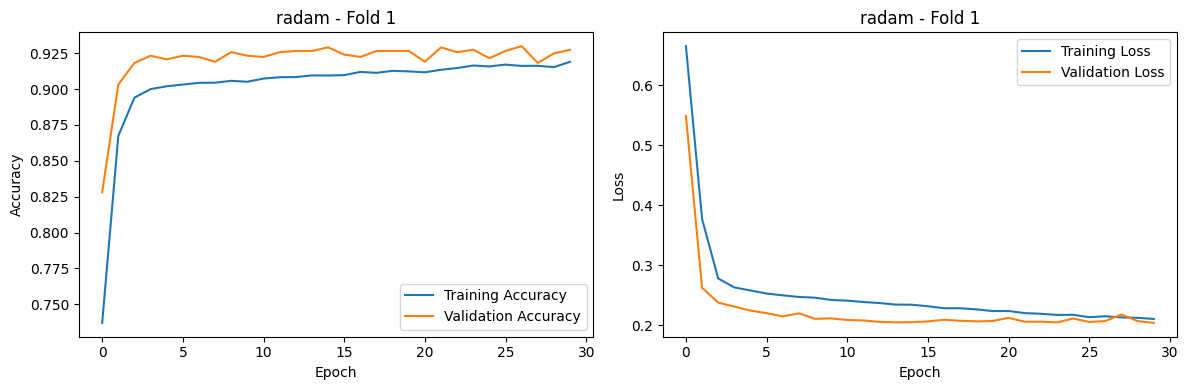

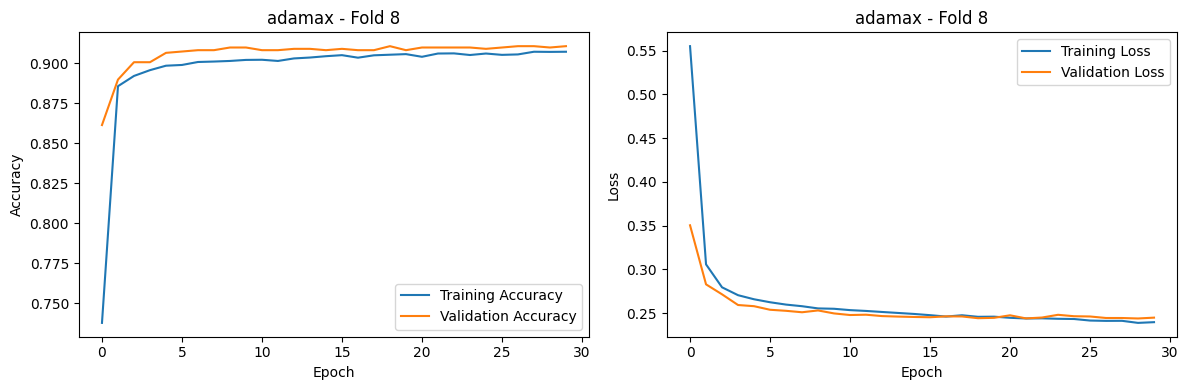

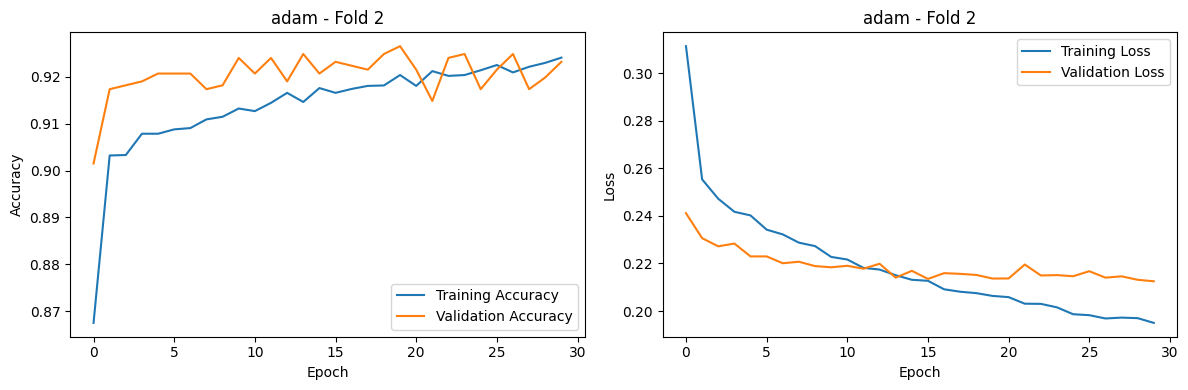

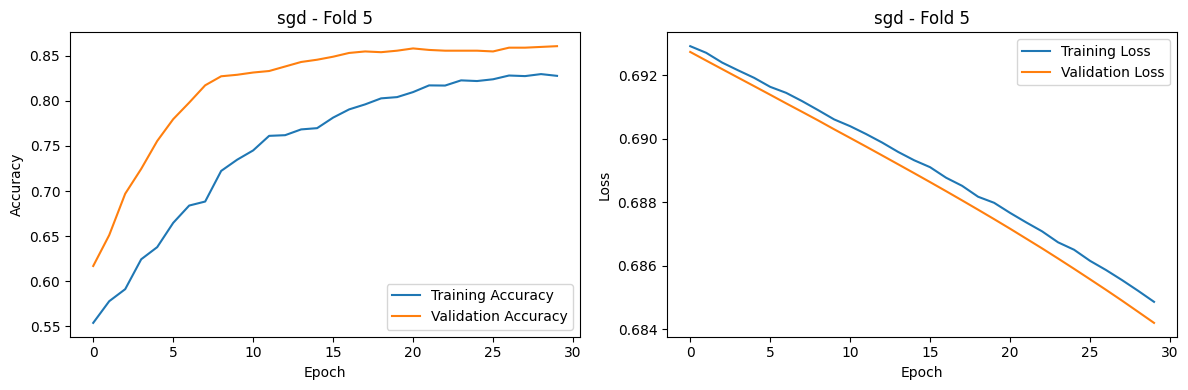

In [19]:
import matplotlib.pyplot as plt

# Iterate over each optimizer
for (optimizer_name, _), optimizer_histories, model in zip(optimizers, histories, models):
    best_fold_index = None
    best_val_accuracy = 0

    # Find the best fold based on val_accuracy
    for fold, history in enumerate(optimizer_histories):
        val_accuracy = history.history['val_accuracy'][-1]
        if val_accuracy > best_val_accuracy:
            best_fold_index = fold
            best_val_accuracy = val_accuracy

    # Plot the best fold for the optimizer
    best_history = optimizer_histories[best_fold_index]
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(best_history.history['accuracy'], label='Training Accuracy')
    plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{optimizer_name} - Fold {best_fold_index+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training loss for the best fold
    plt.subplot(1, 2, 2)
    plt.plot(best_history.history['loss'], label='Training Loss')
    plt.plot(best_history.history['val_loss'], label='Validation Loss')
    plt.title(f'{optimizer_name} - Fold {best_fold_index+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
        
    # Save the plot as a PNG file
    plt.savefig(f'{optimizer_name}_fold{best_fold_index+1}.png')

    plt.show()




# **Evaluasi Model**



In [20]:

## masi perlu ditandai yang terbaik

##BERDASARKAN VAL ACCCURACY

from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adamax, Adam

# Define a dictionary of custom_objects for non-radam optimizers
custom_optimizers = {'adamax': Adamax, 'adam': Adam, 'sgd': SGD}

# Load the best model with the appropriate optimizer
best_model_info = performance_df.loc[performance_df['val_accuracy'].idxmax()]

if best_model_info['optimizer'] == 'radam':
    best_model = load_model(f"model_radam_fold{best_model_info['fold']}.hdf5", custom_objects={'RAdam': RAdam})
else:
    best_model = load_model(f"model_{best_model_info['optimizer']}_fold{best_model_info['fold']}.hdf5", 
                            custom_objects={best_model_info['optimizer']: custom_optimizers[best_model_info['optimizer']]})

print(f"The best model is model_{best_model_info['optimizer']}_fold{best_model_info['fold']}.hdf5 with a validation accuracy of {best_model_info['val_accuracy']}.")

# Save the performance metrics to a CSV file
performance_df.to_csv('performance_metrics.csv', index=False)


The best model is model_radam_fold1.hdf5 with a validation accuracy of 0.9273789525032043.


# **SEMUA METRICS**



In [21]:
from keras.models import load_model
import os

# Define the evaluation metrics you are interested in
metrics = ['recall', 'precision', 'f1_score', 'specificity','training_time']
custom_optimizers = {'adamax': Adamax, 'adam': Adam, 'sgd': SGD}

# For each metric, find the model with the best performance and save it
for metric in metrics:
    if metric == 'training_time':
        best_model_info = performance_df.loc[performance_df[metric].idxmin()]
    else:
        best_model_info = performance_df.loc[performance_df[metric].idxmax()]
    if best_model_info['optimizer'] == 'radam':
        best_model = load_model(f"model_radam_fold{best_model_info['fold']}.hdf5", custom_objects={'RAdam': RAdam})
    else:
        best_model = load_model(f"model_{best_model_info['optimizer']}_fold{best_model_info['fold']}.hdf5", 
                                custom_objects={best_model_info['optimizer']: custom_optimizers[best_model_info['optimizer']]})

    print(f"The model with the best {metric} is model_{best_model_info['optimizer']}_fold{best_model_info['fold']}.hdf5 with a {metric} of {best_model_info[metric]}.")

    # Save the model with the best performance in a separate directory
    os.makedirs(f'best_{metric}_model', exist_ok=True)
    best_model.save(f"best_{metric}_model/model_{best_model_info['optimizer']}_fold{best_model_info['fold']}.hdf5")


The model with the best recall is model_radam_fold1.hdf5 with a recall of 0.9289464037363198.
The model with the best precision is model_radam_fold1.hdf5 with a precision of 0.9272308189703227.
The model with the best f1_score is model_radam_fold1.hdf5 with a f1_score of 0.9272938069357799.
The model with the best specificity is model_radam_fold4.hdf5 with a specificity of 0.9642276422764228.
The model with the best training_time is model_sgd_fold10.hdf5 with a training_time of 29.64009404182434.


## **Grafik PLOT**



38/38 [==============================] - 1s 2ms/step
AUC for adam: 0.9759598740270038
38/38 [==============================] - 1s 2ms/step
AUC for adamax: 0.9608274795349723
38/38 [==============================] - 1s 2ms/step
AUC for radam: 0.9702168232022604
38/38 [==============================] - 1s 2ms/step
AUC for sgd: 0.9095253118613403


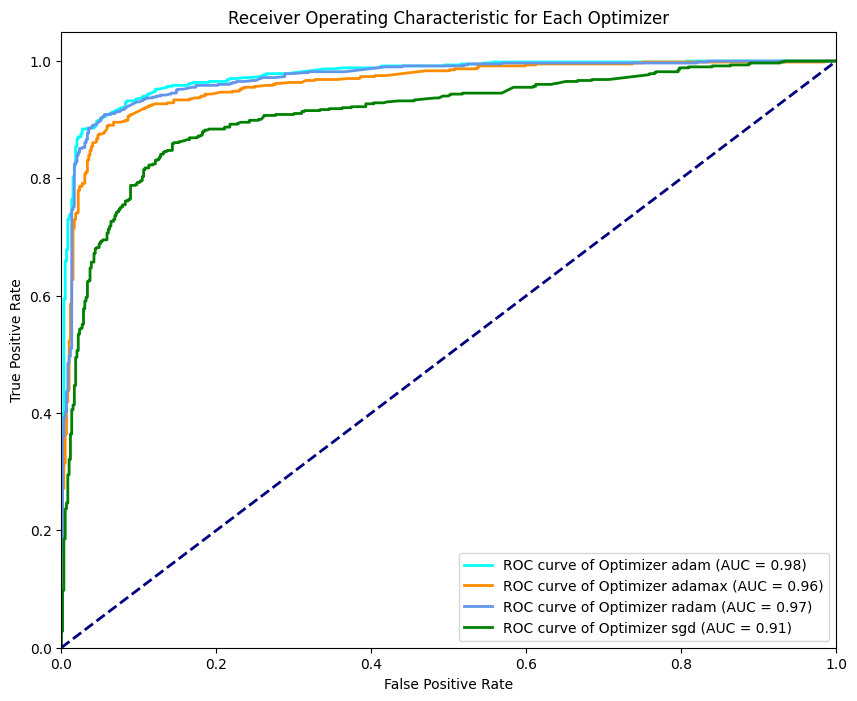

In [30]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Set the number of optimizers
n_classes = len(optimizers)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for each optimizer
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])

# Group by optimizer and get the fold with the best validation accuracy
best_folds = performance_df.sort_values('f1_score', ascending=False).groupby('optimizer').first()


# For each optimizer, find the best fold and plot the ROC curve
for optimizer, color in zip(best_folds.index, colors):
    best_fold = best_folds.loc[optimizer]
    
    if optimizer == 'radam':
        model = load_model(f"dengan feature selection/model_radam_fold{int(best_fold['fold'])}.hdf5", custom_objects={'RAdam': RAdam})
    else:
        model = load_model(f"dengan feature selection/model_{optimizer}_fold{int(best_fold['fold'])}.hdf5")
    
    # get the ground truth and prediction
    y_test = y_array[val_index]
    y_score = model.predict(X_reshaped[val_index])

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    label = f'ROC curve of Optimizer {optimizer} (AUC = {roc_auc:0.2f})'
    
    plt.plot(fpr, tpr, color=color, lw=2, label=label)

    print(f"AUC for {optimizer}: {roc_auc}")

# Define the random and perfect classifiers
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Optimizer')
plt.legend(loc="lower right")
plt.show()

# # Save the figure
# fig.savefig('training.png')
